# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
# Importando biblioteca
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
# Importando os dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo_09/SINASC_RO_2019.csv"
df = pd.read_csv(link)
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Verificando as colunas com números
df.select_dtypes(["int64","float64"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      27028 non-null  int64  
 1   CODESTAB    26913 non-null  float64
 2   CODMUNNASC  27028 non-null  int64  
 3   LOCNASC     27028 non-null  int64  
 4   IDADEMAE    27028 non-null  int64  
 5   ESTCIVMAE   26711 non-null  float64
 6   CODOCUPMAE  24121 non-null  float64
 7   QTDFILVIVO  25455 non-null  float64
 8   QTDFILMORT  24930 non-null  float64
 9   CODMUNRES   27028 non-null  int64  
 10  CONSULTAS   27028 non-null  int64  
 11  HORANASC    27007 non-null  float64
 12  APGAR1      26932 non-null  float64
 13  APGAR5      26925 non-null  float64
 14  PESO        27028 non-null  int64  
 15  IDANOMAL    26437 non-null  float64
 16  NUMEROLOTE  27028 non-null  int64  
 17  DIFDATA     27028 non-null  int64  
 18  DTRECORIGA  0 non-null      float64
 19  NATURALMAE  26730 non-nul

# Tarefa 2

## 1 Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
'''
Selecionando as colunas de interesse:
Usou-se a coluna com a quantidade de filhos mortos e quantidade de consultas.
'''
colunas = [
    "munResLat",
    "QTDFILMORT",
    "CONSULTAS"
]
df_copy = df[colunas].copy()
df_copy.head()

,munResLat,QTDFILMORT,CONSULTAS
0,-11.93554,0.0,4
1,-11.93554,0.0,4
2,-11.93554,0.0,4
3,-12.13178,0.0,3
4,-11.93554,0.0,4


In [6]:
'''
Para a descritização das faixas de latitude, foi usada a função cut, com valores
abaixo e acima de -10,5.
Para realizar o groupby, esse foi inserido na DataFrame.
'''
labels = ["abaixo -10,5","acima -10,5"]
bins = [-200,-10.5,200]
x = df_copy[colunas[0]]
df_copy["munResLatCat"] = pd.cut(x=x, bins=bins, labels=labels)
df_copy.head()

,munResLat,QTDFILMORT,CONSULTAS,munResLatCat
0,-11.93554,0.0,4,"abaixo -10,5"
1,-11.93554,0.0,4,"abaixo -10,5"
2,-11.93554,0.0,4,"abaixo -10,5"
3,-12.13178,0.0,3,"abaixo -10,5"
4,-11.93554,0.0,4,"abaixo -10,5"


In [7]:
# Verificando as classes
df_copy['munResLatCat'].value_counts()

acima -10,5     14034
abaixo -10,5    12993
Name: munResLatCat, dtype: int64

In [8]:
'''
As funções necessários para o groupby foram inseridas em uma lista,
para que sejam usadas com agg.
'''
funcoes = [
    np.sum,
    np.mean,
    np.max,
    np.min,
    np.median,
    np.std,
    np.var,
]

df_copy.groupby("munResLatCat")[colunas[1:]].agg(funcoes)

QTDFILMORT                                                  \
                    sum      mean   max  min median       std       var   
munResLatCat                                                              
abaixo -10,5     3105.0  0.242521  28.0  0.0    0.0  0.599430  0.359317   
acima -10,5      3538.0  0.291770   9.0  0.0    0.0  0.627856  0.394204   

             CONSULTAS                                               
                   sum      mean max min median       std       var  
munResLatCat                                                         
abaixo -10,5     48000  3.694297   9   1    4.0  0.643372  0.413928  
acima -10,5      48662  3.467436   9   1    4.0  0.888240  0.788970

### Conclusão
<br>
- Quantidade de filhos mortos:
<br>
Observa-se que soma, média, desvio padrão e variância da quantidade de filhos mortos têm pouca variabilidade, quando comparamos as faixas acima e abaixo de -10,5 de latitude. Não podemos dizer se essa é significativa.
<br>
Já os valores mínimos e a mediana são 0, o que pode indicar algum problema na base de dados.
<br>
Quanto ao máximo, observamos 28 abaixo de -10,5 e 9 acima. O valor abaixo parece também ser um erro do banco de dados.
<br>
<br>
- Número de consultas:
<br>
Observou-se pouca variação em todas as medidas resumo, quando comparado municípios acima e abaixo de -10,5. Não é possível dizer se essa é significativa.




---



## 2 Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:
'''
Selecionando as colunas de interesse:
Usou-se a coluna com a quantidade de filhos mortos e quantidade de consultas.
'''
colunas = [
    "munResArea",
    "QTDFILMORT",
    "CONSULTAS"
]
df_copy = df[colunas].copy()
df_copy.head()

,munResArea,QTDFILMORT,CONSULTAS
0,7067.025,0.0,4
1,7067.025,0.0,4
2,7067.025,0.0,4
3,3958.273,0.0,3
4,7067.025,0.0,4


In [10]:
# Verificando máximos e mínimos
print(df_copy["munResArea"].max())
print(df_copy["munResArea"].min())

34096.394
459.978


In [11]:
'''
Para a criação das faixas de área, foi usada a função cut, com valores
abaixo e acima de 3.000.
Para realizar o groupby, esse foi inserido na DataFrame.
'''
labels = ["abaixo 3.000","acima 3.000"]
minimo = df_copy["munResArea"].min() - 10
maximo = df_copy["munResArea"].max() + 10
bins = [minimo, 3_000, maximo]
x = df_copy[colunas[0]]
df_copy["munResAreaCat"] = pd.cut(x=x, bins=bins, labels=labels)
df_copy.head()

,munResArea,QTDFILMORT,CONSULTAS,munResAreaCat
0,7067.025,0.0,4,acima 3.000
1,7067.025,0.0,4,acima 3.000
2,7067.025,0.0,4,acima 3.000
3,3958.273,0.0,3,acima 3.000
4,7067.025,0.0,4,acima 3.000


In [12]:
# Verificando as classes
df_copy["munResAreaCat"].value_counts()

acima 3.000     21808
abaixo 3.000     5219
Name: munResAreaCat, dtype: int64

In [13]:
'''
Agrupando e obtendo os valores necessários.
'''
df_copy.groupby("munResAreaCat")[colunas[1:]].agg(funcoes)

QTDFILMORT                                                  \
                     sum      mean   max  min median       std       var   
munResAreaCat                                                              
abaixo 3.000      1260.0  0.244803   4.0  0.0    0.0  0.551215  0.303838   
acima 3.000       5383.0  0.272116  28.0  0.0    0.0  0.629081  0.395743   

              CONSULTAS                                               
                    sum      mean max min median       std       var  
munResAreaCat                                                         
abaixo 3.000      19520  3.740180   9   1    4.0  0.607492  0.369046  
acima 3.000       77142  3.537326   9   1    4.0  0.820967  0.673986

### Conclusão:
<br>
<br>
- Quantidade de filhos mortos:
<br>
Para essa variável, foram encontrados somas maiores acima de 3.000, quando comparado com abaixo de 3.000 de área do município, o que é esperado pois municípios maiores tendem a ter mais moradores. O mesmo ocorre para a máximo, porem o valor de 28 para essa medida parece ser um erro do banco, assim como 0 para mediana. Já o desvio padrão e a variância mostra que os dados são relativamente homogênios e sem grandes variações entre as regiões acima e abaixo de 3.000 de área.
<br>
<br>
- Número de consultas
<br>
Já para essa variável, as medidas resumo pouco diferem entre municípios acima ou abaixo de 3.000 de área, com exceção da soma, que é maior acima, como esperado. O desvio padrão e a variância são pequenos, o que indica homogeneidade, máximo de 9 e mnínimo de 1 mostra consitência com 9 meses de gravidez, mediana de 4 com média de aproximadamente 3,5 mostra uma distribuição normal da variável.



---



## 3 Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
'''
Selecionando as colunas de interesse:
Usou-se a coluna com a quantidade de filhos mortos e quantidade de consultas.
'''
colunas = [
    "munResAlt",
    "QTDFILMORT",
    "CONSULTAS"
]
df_copy = df[colunas].copy()
df_copy.head()

,munResAlt,QTDFILMORT,CONSULTAS
0,338.0,0.0,4
1,338.0,0.0,4
2,338.0,0.0,4
3,397.0,0.0,3
4,338.0,0.0,4


In [15]:
'''
Para a determinação de classes, foram usados os quartis,
obtendo-se os valores da função describe()
'''
bins = df_copy['munResAlt'].describe().iloc[3:].values
labels = df_copy['munResAlt'].describe().iloc[3:].index[1:]

bins[0] = bins[0]-1
bins[-1] = bins[-1]+1
print(bins)
print(labels)

[ 84.  87. 153. 191. 596.]
Index(['25%', '50%', '75%', 'max'], dtype='object')


In [16]:
'''
Para a discretização das faixas de altitude, foi usada a função cut, com valores
em relação aos quartis.
Para realizar o groupby, esse foi inserido na DataFrame.
'''
x = df_copy[colunas[0]]
df_copy["munResAltCat"] = pd.cut(x=x, bins=bins, labels=labels)
df_copy.head()

,munResAlt,QTDFILMORT,CONSULTAS,munResAltCat
0,338.0,0.0,4,max
1,338.0,0.0,4,max
2,338.0,0.0,4,max
3,397.0,0.0,3,max
4,338.0,0.0,4,max


In [17]:
# Verificando as classes
df_copy['munResAltCat'].value_counts()

25%    8774
75%    6938
max    6467
50%    4848
Name: munResAltCat, dtype: int64

In [18]:
'''
Agrupando e obtendo os valores necessários.
'''
df_copy.groupby("munResAltCat")[colunas[1:]].agg(funcoes).round(2)

QTDFILMORT                                     CONSULTAS        \
                    sum  mean   max  min median   std   var       sum  mean   
munResAltCat                                                                  
25%              2282.0  0.31   9.0  0.0    0.0  0.64  0.41     29285  3.34   
50%              1238.0  0.28   9.0  0.0    0.0  0.64  0.41     17294  3.57   
75%              1585.0  0.23   5.0  0.0    0.0  0.53  0.29     25991  3.75   
max              1538.0  0.24  28.0  0.0    0.0  0.64  0.41     24092  3.73   

                                         
             max min median   std   var  
munResAltCat                             
25%            9   1    4.0  0.98  0.97  
50%            9   1    4.0  0.74  0.55  
75%            9   1    4.0  0.58  0.34  
max            9   1    4.0  0.62  0.38

### Conclusão:
<br>
<br>
- Quantidade de filhos mortos:
<br>
O padrão geral dos dados se manteve o mesmo já observado para altitude e latitude dos municípios, com exceção da soma pois, aqui, no quartil menor de altitude observa-se soma maior.
<br>
<br>
- Número de consultas:
<br>
Também é mantido o padrão já observado, bem como a relação da soma maior em quartil de até 25%.



---



## 4 Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [19]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [20]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [21]:
'''
Selecionando as colunas de interesse:
Usou-se a coluna com a idade da mãe e a data de nascimento do filho.
'''
colunas = [
    "IDADEMAE",
    "DTNASC"
]
df_copy = df[colunas].copy()
df_copy.head()

,IDADEMAE,DTNASC
0,19,2019-02-19
1,29,2019-02-21
2,37,2019-02-25
3,30,2019-03-20
4,30,2019-03-23


In [22]:
# Substituindo o nome dos municípios pelas regiões Imediatas
df_copy["munImediata"] = df["munResNome"].replace(imediatas)
df_copy["munImediata"].value_counts()

Porto Velho                10096
Ji-Paraná                   4962
Cacoal                      4603
Ariquemes                   3233
Vilhena                     2450
Jaru                        1683
Município ignorado - RO        1
Name: munImediata, dtype: int64

In [23]:
# Calulando a média de idade das mães por região Imediata
df_copy.pivot_table(
    values='IDADEMAE',
    index="munImediata",
    aggfunc="mean"
)

,IDADEMAE
munImediata,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Município ignorado - RO,24.000000
Porto Velho,26.166303
Vilhena,26.417143


In [24]:
# Calulando a média de idade das mães por região Imediata e por data de nascimento
df_copy_pivot = pd.pivot_table(
    data=df_copy,
    values="IDADEMAE",
    index=["DTNASC","munImediata"],
    aggfunc="mean"
).reset_index()
df_copy_pivot.head()

,DTNASC,munImediata,IDADEMAE
0,2019-01-01,Ariquemes,23.200000
1,2019-01-01,Cacoal,23.250000
2,2019-01-01,Jaru,31.000000
3,2019-01-01,Ji-Paraná,24.142857
4,2019-01-01,Porto Velho,21.388889


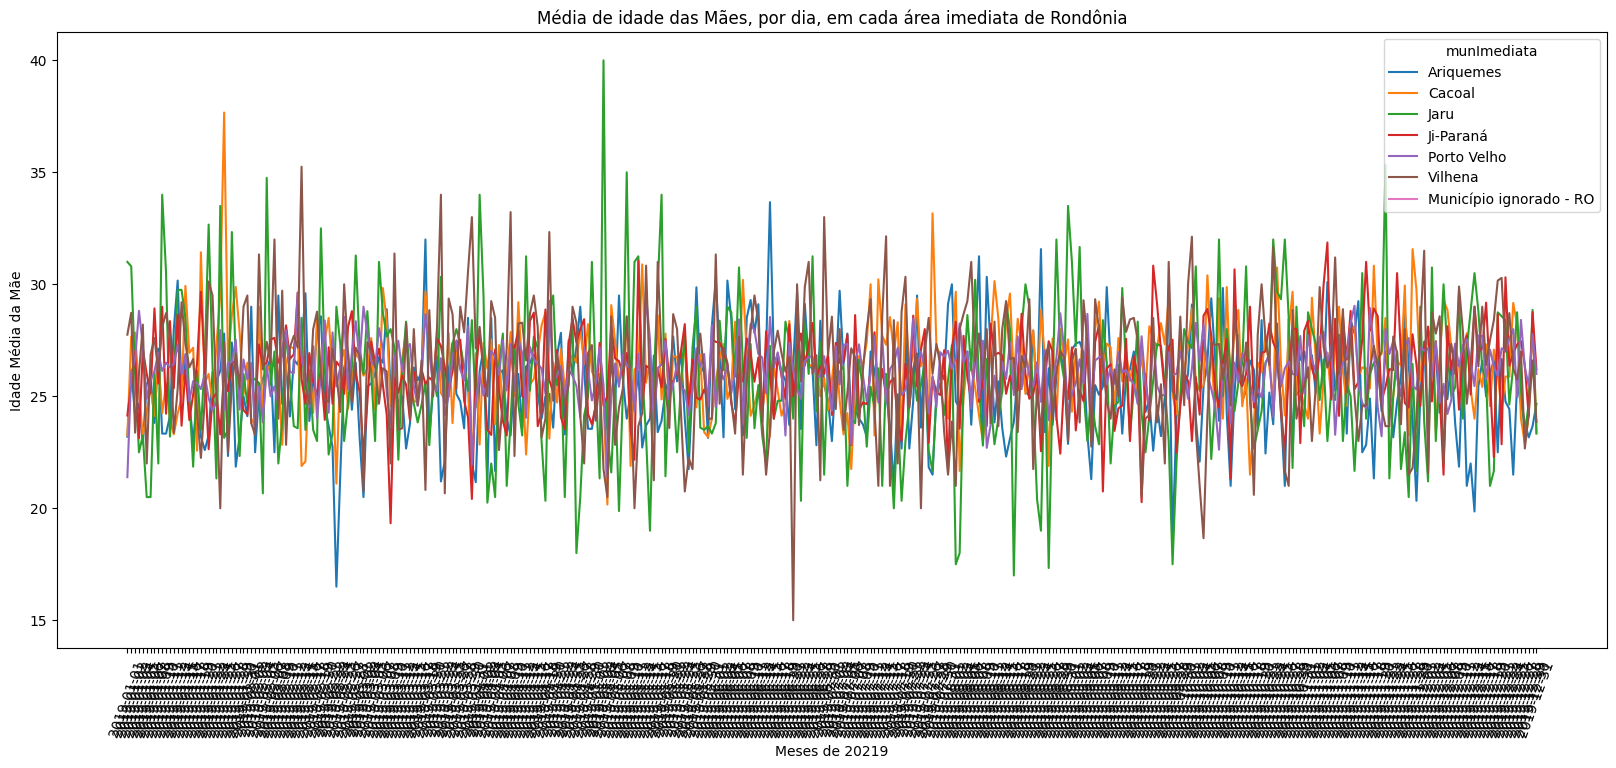

In [25]:
# Plot das idades das mães
plt.figure(figsize=(20,8))
sns.lineplot(
    y="IDADEMAE",
    x="DTNASC",
    hue="munImediata",
    data=df_copy_pivot
)

plt.title("Média de idade das Mães, por dia, em cada área imediata de Rondônia")
plt.xlabel("Meses de 20219")
plt.ylabel("Idade Média da Mãe")
plt.xticks(rotation=70)
plt.show()

O gráfico acima apresenta baixa resolução, uma vez que os dados são diários e estão sobrepostos.
<br>
Para melhor visualizar a variável, os dados serão agrupos por mes.

In [26]:
# Obtendo o mês de nascimento dos filhos
df_copy['DTNASC_MES'] = df_copy['DTNASC'].apply(lambda i: i.split("-")[1])
df_copy.head()

,IDADEMAE,DTNASC,munImediata,DTNASC_MES
0,19,2019-02-19,Cacoal,02
1,29,2019-02-21,Cacoal,02
2,37,2019-02-25,Cacoal,02
3,30,2019-03-20,Cacoal,03
4,30,2019-03-23,Cacoal,03


In [27]:
# Calulando a média de idade das mães por região Imediata e por mês de nascimento
df_copy_pivot = pd.pivot_table(
    data=df_copy,
    values="IDADEMAE",
    index=["DTNASC_MES","munImediata"],
    aggfunc="mean"
).reset_index()
df_copy_pivot.head()

,DTNASC_MES,munImediata,IDADEMAE
0,01,Ariquemes,24.866412
1,01,Cacoal,26.350543
2,01,Jaru,26.086667
3,01,Ji-Paraná,25.792056
4,01,Porto Velho,26.017668


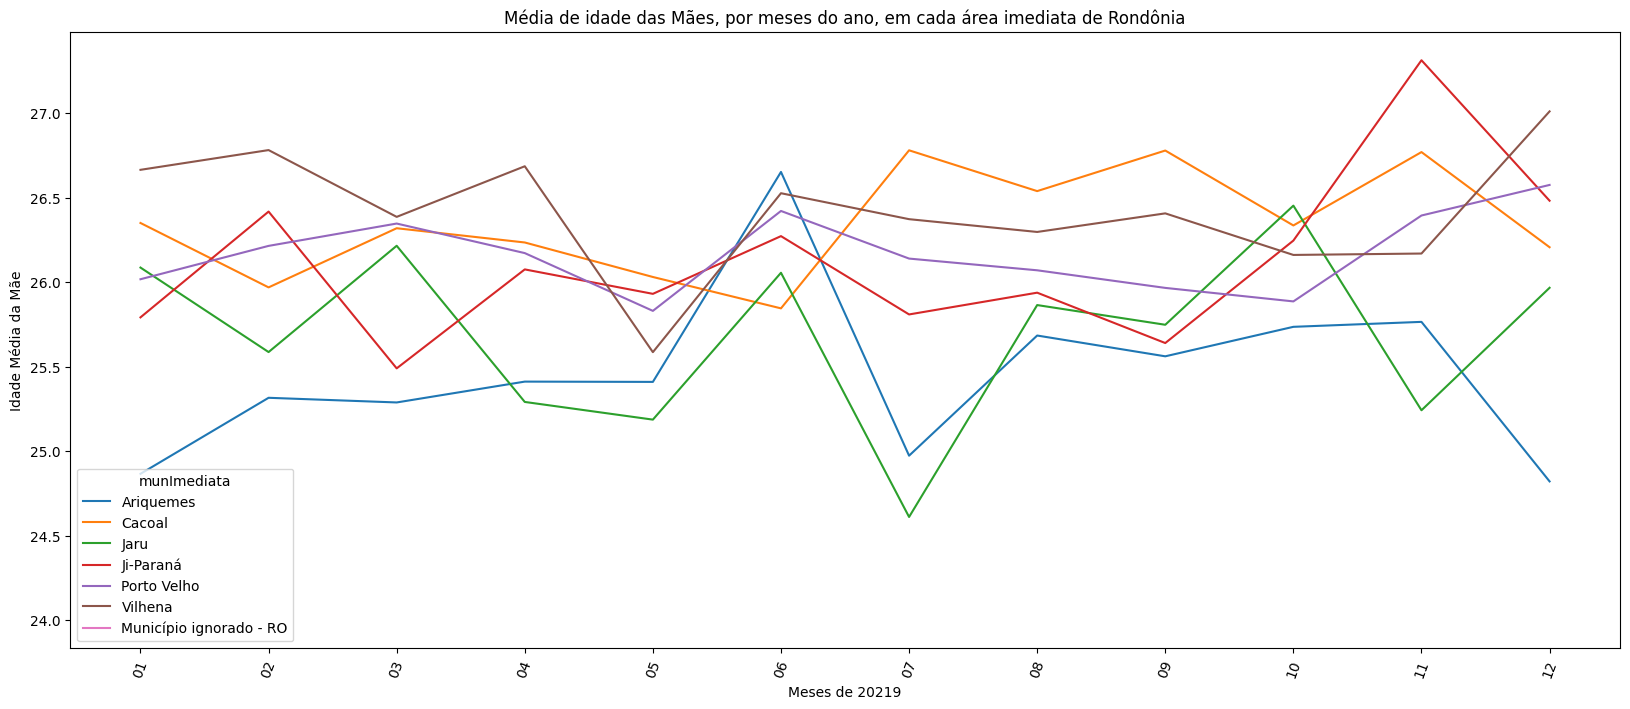

In [29]:
# Plot das idades das mães
plt.figure(figsize=(20,8))
sns.lineplot(
    y="IDADEMAE",
    x="DTNASC_MES",
    hue="munImediata",
    data=df_copy_pivot
)
plt.title("Média de idade das Mães, por meses do ano, em cada área imediata de Rondônia")
plt.xlabel("Meses de 20219")
plt.ylabel("Idade Média da Mãe")
plt.xticks(rotation=70)
plt.show()

### Conclusão:
<br>
<br>
A média de idade das mães apresenta pouca variação ao longo do ano e das regiões imediatas, cerca de 3 anos.<br>
Em algumas regiões parece ter ocorrido uma mudança discreta no período de 6 meses. Em Cacoal a média teve um aumento de junho a dezembro, já para Jaru e Ariquemes ocorreu um pico também em junho.



---



## 5 Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


Esta é uma lista de municípios do estado de Rondônia por Índice de Desenvolvimento Humano (IDH), segundo dados do Programa da Nações Unidas para o Desenvolvimento (PNUD) datados do ano 2010.[1] De acordo com os dados de 2010, o município com o maior Índice de Desenvolvimento Humano no estado de Rondônia era Porto Velho, com um índice de 0,736 (considerado alto), e o município com o menor índice foi Vale do Anari, com um índice de 0,584 (considerado baixo). De todos os municípios do estado, nenhum município registrou um IDH muito alto, enquanto 7 apresentaram um IDH alto, 36 municípios IDH médio, 9 IDH baixo, e nenhum município IDH muito baixo.[1]

In [30]:
# Importando os dados de IDH
link = "https://pt.wikipedia.org/wiki/"
link += "Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"
df_idh = pd.read_html(link)
df_idh = df_idh[0]
colunas_idh = df_idh.columns
df_idh

Posição                  Município      Dados de 2010  \
              Posição                  Município      IDH municipal   
     IDH-M muito alto           IDH-M muito alto   IDH-M muito alto   
0    nenhum município           nenhum município   nenhum município   
1          IDH-M alto                 IDH-M alto         IDH-M alto   
2                   1                Porto Velho              0.736   
3                   2                    Vilhena              0.731   
4                   3                     Cacoal              0.718   
5                   4                  Ji-Paraná              0.714   
6                   5              Pimenta Bueno              0.710   
7                   6                  Ariquemes              0.702   
8                   7             Rolim de Moura              0.700   
9         IDH-M médio                IDH-M médio        IDH-M médio   
10                  8                 Cerejeiras              0.692   
11                  9                       Jaru              0.689   
12                 10          Colorado do Oeste              0.685   
13                 11        Ouro Preto do Oeste              0.682   
14                 12            Espigão d'Oeste              0.672   
15                 13        Santa Luzia d'Oeste              0.670   
16                 14       Pimenteiras do Oeste              0.665   
17                 15          Presidente Médici              0.664   
18                 16               Castanheiras              0.658   
19                 17              Guajará-Mirim              0.657   
20                 18                Chupinguaia              0.652   
21                 19                     Cabixi              0.650   
22                 20         Candeias do Jamari              0.649   
23                 20         São Felipe d'Oeste              0.649   
24                 22                Cacaulândia              0.646   
25                 22      São Miguel do Guaporé              0.646   
26                 24           Mirante da Serra              0.643   
27                 24           Alvorada d'Oeste              0.643   
28                 24              Teixeirópolis              0.643   
29                 24   Nova Brasilândia d'Oeste              0.643   
30                 24                 Rio Crespo              0.643   
31                 29      Primavera de Rondônia              0.641   
32                 29      Alta Floresta d'Oeste              0.641   
33                 31         Ministro Andreazza              0.638   
34                 32    Novo Horizonte do Oeste              0.634   
35                 33            Vale do Paraíso              0.627   
36                 34               Alto Paraíso              0.625   
37                 35                    Parecis              0.617   
38                 36                    Buritis              0.616   
39                 37            Itapuã do Oeste              0.614   
40                 38                 Corumbiara              0.613   
41                 39                    Cujubim              0.612   
42                 40              Costa Marques              0.611   
43                 40   São Francisco do Guaporé              0.611   
44                 42                      Urupá              0.609   
45                 43                Monte Negro              0.607   
46        IDH-M baixo                IDH-M baixo        IDH-M baixo   
47                 44               Seringueiras              0.598   
48                 45  Governador Jorge Teixeira              0.596   
49                 45         Machadinho d'Oeste              0.596   
50                 47     Campo Novo de Rondônia              0.593   
51                 48    Alto Alegre dos Parecis              0.592   
52                 49                  Theobroma              0.589   
53                 50                 

In [31]:
# Formtando a DataFrame para retirar informações desnecessárias do index e das linhas
df_idh.columns = [col[1] for col in df_idh.columns]
df_idh = df_idh.drop([0,56,57], axis=0)

df_idh

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
1,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
2,1,Porto Velho,0.736,0.764,0.819,0.638
3,2,Vilhena,0.731,0.734,0.808,0.659
4,3,Cacoal,0.718,0.727,0.821,0.620
5,4,Ji-Paraná,0.714,0.728,0.810,0.617
6,5,Pimenta Bueno,0.710,0.726,0.803,0.613
7,6,Ariquemes,0.702,0.716,0.806,0.600
8,7,Rolim de Moura,0.700,0.709,0.808,0.598
9,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio
10,8,Cerejeiras,0.692,0.688,0.799,0.602


In [32]:
# Instanciando DataFrame com os dados de IDH alto
df_idh_alto = df_idh.loc[2:8,["Município"]].copy()
df_idh_alto['FAIXAIDH'] = "alto"
df_idh_alto

,Município,FAIXAIDH
2,Porto Velho,alto
3,Vilhena,alto
4,Cacoal,alto
5,Ji-Paraná,alto
6,Pimenta Bueno,alto
7,Ariquemes,alto
8,Rolim de Moura,alto


In [33]:
# Instanciando DataFrame com os dados de IDH médio
df_idh_medio = df_idh.loc[10:45,["Município"]].copy()
df_idh_medio['FAIXAIDH'] = "medio"
df_idh_medio

,Município,FAIXAIDH
10,Cerejeiras,medio
11,Jaru,medio
12,Colorado do Oeste,medio
13,Ouro Preto do Oeste,medio
14,Espigão d'Oeste,medio
15,Santa Luzia d'Oeste,medio
16,Pimenteiras do Oeste,medio
17,Presidente Médici,medio
18,Castanheiras,medio
19,Guajará-Mirim,medio


In [34]:
# Instanciando DataFrame com os dados de IDH baixo
df_idh_baixo = df_idh.loc[47:,["Município"]].copy()
df_idh_baixo['FAIXAIDH'] = "baixo"
df_idh_baixo

,Município,FAIXAIDH
47,Seringueiras,baixo
48,Governador Jorge Teixeira,baixo
49,Machadinho d'Oeste,baixo
50,Campo Novo de Rondônia,baixo
51,Alto Alegre dos Parecis,baixo
52,Theobroma,baixo
53,Nova União,baixo
54,Nova Mamoré,baixo
55,Vale do Anari,baixo


In [36]:
# Concatenando as DataFrames de IDH
df_idh_faixa = pd.concat([df_idh_alto,df_idh_medio,df_idh_baixo])
df_idh_faixa.rename(columns={"Município":"munResNome"}, inplace=True)

df_idh_faixa.head()

,munResNome,FAIXAIDH
2,Porto Velho,alto
3,Vilhena,alto
4,Cacoal,alto
5,Ji-Paraná,alto
6,Pimenta Bueno,alto


In [37]:
# Verificando colunas originais
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [38]:
'''
Selecionando as colunas de interesse:
'''
colunas = [
    "munResNome",
    "ESCMAE",
    "QTDFILMORT",
    "QTDFILVIVO",
    "IDADEMAE",
    "PESO",
    "CONSULTAS"
]
df_copy = df[colunas].copy()
df_copy.head()

,munResNome,ESCMAE,QTDFILMORT,QTDFILVIVO,IDADEMAE,PESO,CONSULTAS
0,Alta Floresta D'Oeste,8 a 11 anos,0.0,0.0,19,3685,4
1,Alta Floresta D'Oeste,8 a 11 anos,0.0,1.0,29,3055,4
2,Alta Floresta D'Oeste,8 a 11 anos,0.0,2.0,37,3460,4
3,Alto Alegre dos Parecis,12 anos ou mais,0.0,0.0,30,2982,3
4,Alta Floresta D'Oeste,8 a 11 anos,0.0,1.0,30,3310,4


In [39]:
'''
Selecionando a DataFrame copiada e inserindo as colunas com IDH para cada município
'''
df_copy = df[colunas].copy()

df_copy_idh = pd.merge(df_copy, df_idh_faixa)
df_copy_idh['FAIXAIDH'].value_counts()

alto     16855
medio     6910
baixo     1326
Name: FAIXAIDH, dtype: int64

In [40]:
# Agrupando para obter a média das variáveis para faixa de IDH e escolaridade da mãe
df_copy_idh.pivot_table(
    index=["FAIXAIDH","ESCMAE"],
    values=colunas[2:],
    aggfunc="mean"
)

CONSULTAS   IDADEMAE         PESO  QTDFILMORT  \
FAIXAIDH ESCMAE                                                           
alto     1 a 3 anos        3.262238  28.143357  3100.164336    0.498084   
         12 anos ou mais   3.578296  29.765963  3256.260986    0.270783   
         4 a 7 anos        3.336063  24.120684  3228.421146    0.298706   
         8 a 11 anos       3.577648  25.288771  3251.573071    0.258072   
         Nenhuma           3.173913  30.739130  3214.782609    0.600000   
baixo    1 a 3 anos        3.259259  28.666667  3285.925926    0.333333   
         12 anos ou mais   3.755556  28.370370  3250.755556    0.228346   
         4 a 7 anos        3.560714  25.192857  3228.271429    0.345238   
         8 a 11 anos       3.652074  24.708525  3250.808756    0.217722   
         Nenhuma           3.333333  30.333333  2890.000000    1.666667   
medio    1 a 3 anos        3.469799  28.892617  3291.375839    0.411348   
         12 anos ou mais   3.746792  29.135158  3234.555175    0.241379   
         4 a 7 anos        3.571656  25.359076  3216.919586    0.366125   
         8 a 11 anos       3.682052  24.943299  3257.423383    0.246942   
         Nenhuma           2.909091  32.909091  2832.000000    0.400000   

                          QTDFILVIVO  
FAIXAIDH ESCMAE                       
alto     1 a 3 anos         2.492593  
         12 anos ou mais    0.714173  
         4 a 7 anos         1.511230  
         8 a 11 anos        0.972004  
         Nenhuma            3.956522  
baixo    1 a 3 anos         2.307692  
         12 anos ou mais    0.828125  
         4 a 7 anos         1.488550  
         8 a 11 anos        0.909091  
         Nenhuma            1.333333  
medio    1 a 3 anos         2.301370  
         12 anos ou mais    0.746441  
         4 a 7 anos         1.642975  
         8 a 11 anos        0.970190  
         Nenhuma            3.000000

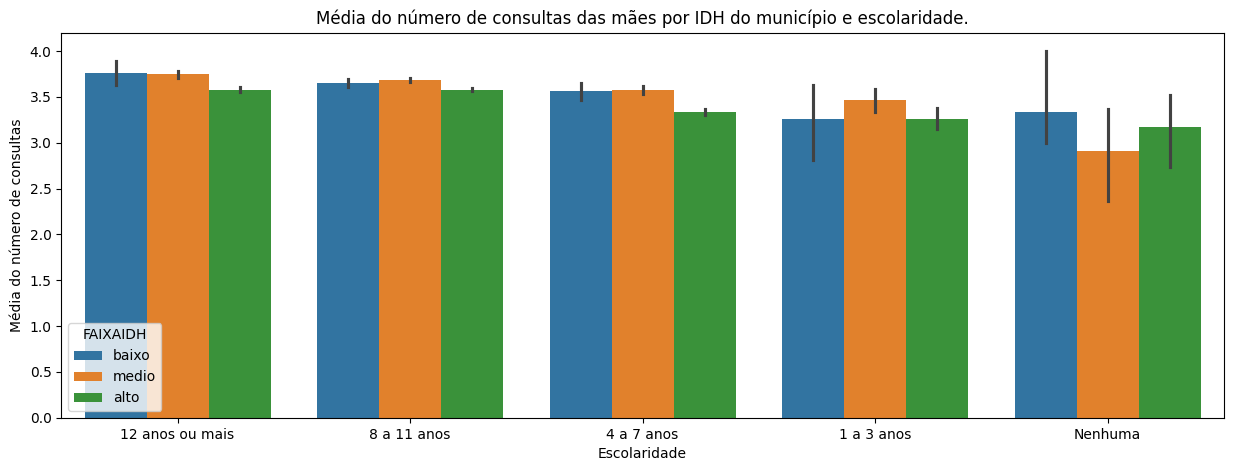

In [42]:
# Plotando número de consultas por escolaridade para as faixas de IDH
plt.figure(figsize=(15,5))
plt.title("Média do número de consultas das mães por IDH do município e escolaridade.")
sns.barplot(
    y="CONSULTAS",
    hue="FAIXAIDH",
    x="ESCMAE",
    data=df_copy_idh
)
plt.xlabel("Escolaridade")
plt.ylabel("Média do número de consultas")
plt.show()

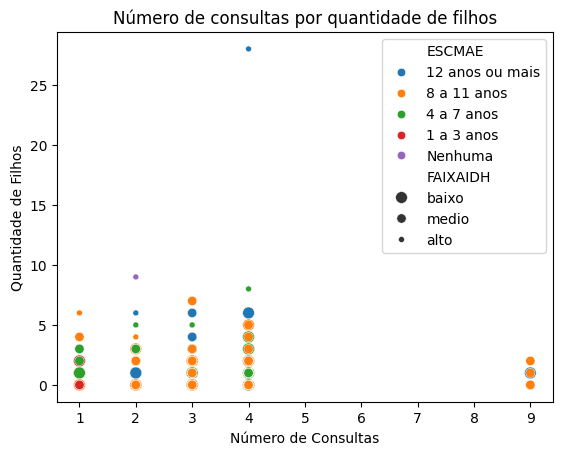

In [43]:
# Plotando número de consultas por escolaridade para as faixas de IDH
plt.title("Número de consultas por quantidade de filhos")
sns.scatterplot(
    x="CONSULTAS",
    y="QTDFILMORT",
    size="FAIXAIDH",
    hue="ESCMAE",
    data=df_copy_idh
)
plt.xlabel("Número de Consultas")
plt.ylabel("Quantidade de Filhos")
plt.show()

#### Conclusão:
<br>
<br>
A média de consultas parece ser mais baixo nas idades de IDH alto, independente da faixa de escolaridade das mães.<br>
Independente da faixa de IDH, médias maiores de número de consultas são observados em mães com maiores escolaridades.

--

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


Esta é uma lista de municípios de Rondônia ordenados por Índice FIRJAN de Desenvolvimento Municipal (IFDM) conforme dados divulgados pelo Sistema FIRJAN em 2015 com base no ano de 2013.[1]

O Índice FIRJAN de Desenvolvimento Municipal (IFDM) é um estudo anual criado para acompanhar o desenvolvimento humano, econômico e social dos municípios do Estado do Rio de Janeiro, mas passou a acompanhar todos os municípios do Brasil (5.565 no total),[2] com base exclusivamente em estatísticas oficiais.[3] Ele leva em conta três indicadores: emprego e renda como um único indicador e educação e saúde como indicadores separados,[4] cada qual com um conjunto respectivo de variáveis. Devido às suas características, a ferramenta tem servido como uma fotografia de políticas públicas e como fonte para "estudos nacionais e internacionais a respeito do desenvolvimento brasileiro".[5] Mesmo porque seu resultado é capaz de retratar o nível de desenvolvimento de cada cidade e, assim, dar uma ideia sobre a qualidade de vida de seus cidadãos.[6]

In [44]:
# Importando os dados de IFDM
link = "https://pt.wikipedia.org/wiki/"
link += "Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"
df_ifdm = pd.read_html(link)
df_ifdm = df_ifdm[0]
df_ifdm

,Posição,Município,IFDM Consolidado (2013)
,Desenvolvimento alto,Desenvolvimento alto,Desenvolvimento alto
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.6850


In [45]:
# Instanciando DataFrame com os dados de IFDM moderado
df_ifdm_moderado = df_ifdm.iloc[2:28,1].to_frame()
df_ifdm_moderado.columns = ["munResNome"]
df_ifdm_moderado['FAIXAIFDM'] = "moderado"
df_ifdm_moderado

,munResNome,FAIXAIFDM
2,Ariquemes,moderado
3,Vilhena,moderado
4,Pimenta Bueno,moderado
5,Porto Velho,moderado
6,Ji-Paraná,moderado
7,Cacoal,moderado
8,Santa Luzia d'Oeste,moderado
9,Rolim de Moura,moderado
10,Chupinguaia,moderado
11,São Miguel do Guaporé,moderado


In [46]:
# Instanciando DataFrame com os dados de IFDM regular
df_ifdm_regular = df_ifdm.iloc[29:55,1].to_frame()
df_ifdm_regular.columns = ["munResNome"]
df_ifdm_regular['FAIXAIFDM'] = "regular"
df_ifdm_regular

,munResNome,FAIXAIFDM
29,Espigão d'Oeste,regular
30,Seringueiras,regular
31,Alvorada d'Oeste,regular
32,Itapuã do Oeste,regular
33,Cabixi,regular
34,Novo Horizonte do Oeste,regular
35,Nova Brasilândia d'Oeste,regular
36,Vale do Paraíso,regular
37,Corumbiara,regular
38,Alto Paraíso,regular


In [47]:
# Concatenando as DataFrames de IFDM
df_ifdm_faixa = pd.concat([df_ifdm_moderado,df_ifdm_regular])
df_ifdm_faixa.head()

,munResNome,FAIXAIFDM
2,Ariquemes,moderado
3,Vilhena,moderado
4,Pimenta Bueno,moderado
5,Porto Velho,moderado
6,Ji-Paraná,moderado


In [48]:
# Selecionando a DataFrame copiada e inserindo as colunas com IFDM para cada município
df_copy = df[colunas].copy()

df_copy_ifdm = pd.merge(df_copy, df_ifdm_faixa)
df_copy_ifdm['FAIXAIFDM'].value_counts()

moderado    21426
regular      3665
Name: FAIXAIFDM, dtype: int64

In [45]:
# Agrupando para obter a média das variáveis para faixa de IFDM e escolaridade da mãe
df_copy_ifdm.pivot_table(
    index=["FAIXAIFDM","ESCMAE"],
    values=colunas[2:],
    aggfunc="mean"
)

CONSULTAS   IDADEMAE         PESO  QTDFILMORT  \
FAIXAIFDM ESCMAE                                                           
moderado  1 a 3 anos        3.305263  28.300000  3157.363158    0.492795   
          12 anos ou mais   3.616653  29.674980  3251.468825    0.266270   
          4 a 7 anos        3.402586  24.439415  3221.141411    0.315447   
          8 a 11 anos       3.620797  25.234803  3251.587254    0.255427   
          Nenhuma           3.172414  30.344828  3060.413793    0.560000   
regular   1 a 3 anos        3.439024  28.951220  3243.707317    0.316456   
          12 anos ou mais   3.645233  28.716186  3251.181818    0.231121   
          4 a 7 anos        3.491117  25.036802  3242.895939    0.347594   
          8 a 11 anos       3.570191  24.717504  3262.029029    0.237118   
          Nenhuma           2.875000  35.000000  3126.250000    0.875000   

                           QTDFILVIVO  
FAIXAIFDM ESCMAE                       
moderado  1 a 3 anos         2.401662  
          12 anos ou mais    0.720885  
          4 a 7 anos         1.515133  
          8 a 11 anos        0.958618  
          Nenhuma            3.724138  
regular   1 a 3 anos         2.493827  
          12 anos ou mais    0.759725  
          4 a 7 anos         1.695538  
          8 a 11 anos        1.014350  
          Nenhuma            2.500000

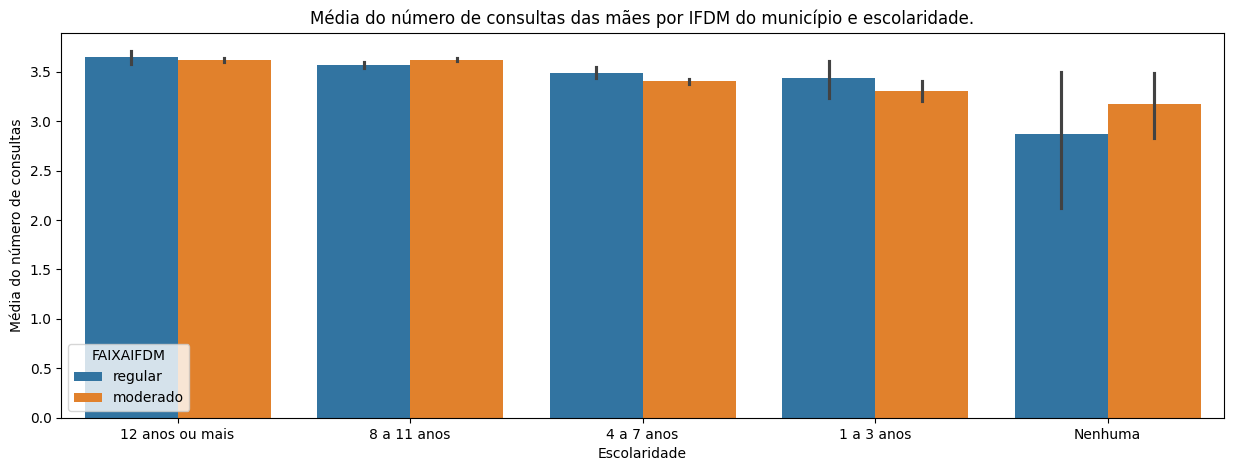

In [49]:
# Plotando número de consultas por escolaridade para as faixas de IFDM
plt.figure(figsize=(15,5))
plt.title("Média do número de consultas das mães por IFDM do município e escolaridade.")
sns.barplot(
    y="CONSULTAS",
    hue="FAIXAIFDM",
    x="ESCMAE",
    data=df_copy_ifdm
)
plt.xlabel("Escolaridade")
plt.ylabel("Média do número de consultas")
plt.show()

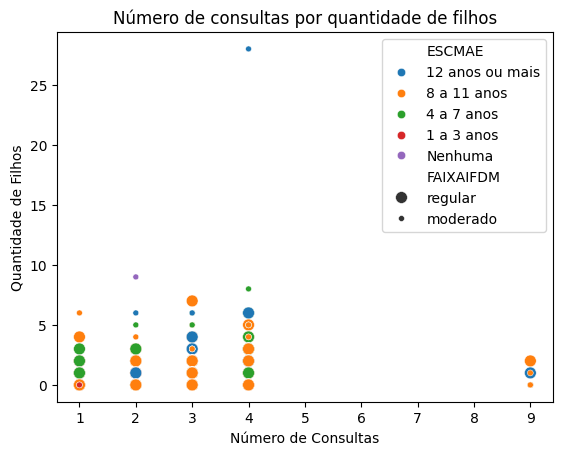

In [50]:
# Plotando número de consultas por escolaridade para as faixas de IFDM
plt.title("Número de consultas por quantidade de filhos")
sns.scatterplot(
    x="CONSULTAS",
    y="QTDFILMORT",
    size="FAIXAIFDM",
    hue="ESCMAE",
    data=df_copy_ifdm
)
plt.xlabel("Número de Consultas")
plt.ylabel("Quantidade de Filhos")
plt.show()

#### Conclusão.

Parace não haver diferenças significativas entre as faixas de IDFM e o número de consultas das mães, independente da escolaridade.

--

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


Esta é uma lista de municípios de Rondônia por Produto Interno Bruto (PIB) referente ao ano de 2019. Os valores são a preços correntes.[1] Rondônia é um estado brasileiro, localizado na Região Norte do Brasil e formado pela união de 52 municípios. Possui o terceiro maior PIB da região Norte do Brasil, superado apenas pelos estados do Pará e Amazonas. Dentre todos os seus municípios, oito deles possuem economia superior ao valor de R$ 1 bilhão de reais.

In [51]:
# Importando os dados
link = "https://pt.wikipedia.org/wiki/"
link += "Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
df_pib = pd.read_html(link)
df_pib = pd.concat([
    df_pib[0],
    df_pib[1],
    df_pib[2],
    df_pib[3],
    df_pib[4],
    df_pib[5]
])
df_pib_faixa = df_pib.iloc[:,[2,3]].copy()
df_pib_faixa.columns = ['munResNome','PIB']
df_pib_faixa

,munResNome,PIB
0,Porto Velho,17 912 070
1,Ji-Paraná,3 783 972
2,Vilhena,2 831 175
3,Ariquemes,2 579 830
4,Cacoal,2 261 644
5,Jaru,1 500 890
6,Rolim de Moura,1 283 434
7,Pimenta Bueno,1 164 877
0,Guajará-Mirim,893 000
1,Ouro Preto do Oeste,834 000


In [52]:
'''
Inserindo o PIB na DataFrame com os dados originais
'''
df_copy = df[colunas].copy()

df_copy_pib = pd.merge(df_copy, df_pib_faixa)
df_copy_pib.head()

,munResNome,ESCMAE,QTDFILMORT,QTDFILVIVO,IDADEMAE,PESO,CONSULTAS,PIB
0,Alto Alegre dos Parecis,12 anos ou mais,0.0,0.0,30,2982,3,213 410
1,Alto Alegre dos Parecis,8 a 11 anos,0.0,2.0,26,2480,4,213 410
2,Alto Alegre dos Parecis,8 a 11 anos,0.0,2.0,26,2728,4,213 410
3,Alto Alegre dos Parecis,4 a 7 anos,0.0,0.0,37,3450,4,213 410
4,Alto Alegre dos Parecis,4 a 7 anos,0.0,0.0,20,3360,4,213 410


In [53]:
# Editando a variável PIB para int
df_copy_pib['PIB'] = df_copy_pib['PIB'].apply(lambda i: int(i.replace(" ","")))
df_copy_pib['PIB'].describe()

count    2.509100e+04
mean     7.093157e+06
std      7.766652e+06
min      5.290800e+04
25%      8.340000e+05
50%      2.579830e+06
75%      1.791207e+07
max      1.791207e+07
Name: PIB, dtype: float64

In [54]:
# Selecionando as faixas de PIB de acordo com os quartis de distribuição
bins = df_copy_pib['PIB'].describe().iloc[3:].values
labels = df_copy_pib['PIB'].describe().iloc[3:].index[1:]

bins[0] = bins[0]-1
bins[-1] = bins[-1]+1
print(bins)
print(labels)

[   52907.   834000.  2579830. 17912070. 17912071.]
Index(['25%', '50%', '75%', 'max'], dtype='object')


In [55]:
'''
Inseridno a discretização do PIB por cidade
'''
x = df_copy_pib["PIB"]
df_copy_pib["PIBCat"] = pd.cut(x=x, bins=bins, labels=labels)
df_copy_pib.head()

,munResNome,ESCMAE,QTDFILMORT,QTDFILVIVO,IDADEMAE,PESO,CONSULTAS,PIB,PIBCat
0,Alto Alegre dos Parecis,12 anos ou mais,0.0,0.0,30,2982,3,213410,25%
1,Alto Alegre dos Parecis,8 a 11 anos,0.0,2.0,26,2480,4,213410,25%
2,Alto Alegre dos Parecis,8 a 11 anos,0.0,2.0,26,2728,4,213410,25%
3,Alto Alegre dos Parecis,4 a 7 anos,0.0,0.0,37,3450,4,213410,25%
4,Alto Alegre dos Parecis,4 a 7 anos,0.0,0.0,20,3360,4,213410,25%


In [56]:
# Agrupando os dados de PIB categorizado e escolaridade da mãe para obter as médias
df_copy_pib.pivot_table(
    index=["PIBCat","ESCMAE"],
    values=colunas[2:],
    aggfunc="mean"
)

CONSULTAS   IDADEMAE         PESO  QTDFILMORT  \
PIBCat ESCMAE                                                           
25%    1 a 3 anos        3.453901  29.085106  3287.836879    0.446154   
       12 anos ou mais   3.780135  29.099325  3227.989392    0.253870   
       4 a 7 anos        3.623548  25.367157  3209.605732    0.353141   
       8 a 11 anos       3.723241  24.884787  3246.328543    0.236218   
       Nenhuma           3.333333  31.777778  2545.222222    1.000000   
50%    1 a 3 anos        3.428571  28.089286  3197.955357    0.468468   
       12 anos ou mais   3.714385  29.302293  3265.062543    0.234758   
       4 a 7 anos        3.483539  24.612140  3235.862140    0.321206   
       8 a 11 anos       3.662840  25.065403  3269.843833    0.232263   
       Nenhuma           2.900000  29.400000  3204.000000    0.200000   
75%    1 a 3 anos        3.191388  28.138756  3081.464115    0.464865   
       12 anos ou mais   3.515779  29.912793  3253.049203    0.282440   
       4 a 7 anos        3.261287  24.009606  3229.655620    0.301310   
       8 a 11 anos       3.518892  25.361239  3248.169655    0.274500   
       Nenhuma           3.111111  32.222222  3267.500000    0.733333   

                        QTDFILVIVO  
PIBCat ESCMAE                       
25%    1 a 3 anos         2.357664  
       12 anos ou mais    0.769386  
       4 a 7 anos         1.541157  
       8 a 11 anos        0.921776  
       Nenhuma            1.888889  
50%    1 a 3 anos         2.306306  
       12 anos ou mais    0.702873  
       4 a 7 anos         1.482402  
       8 a 11 anos        0.918795  
       Nenhuma            2.800000  
75%    1 a 3 anos         2.525773  
       12 anos ou mais    0.718798  
       4 a 7 anos         1.587093  
       8 a 11 anos        1.025499  
       Nenhuma            4.611111

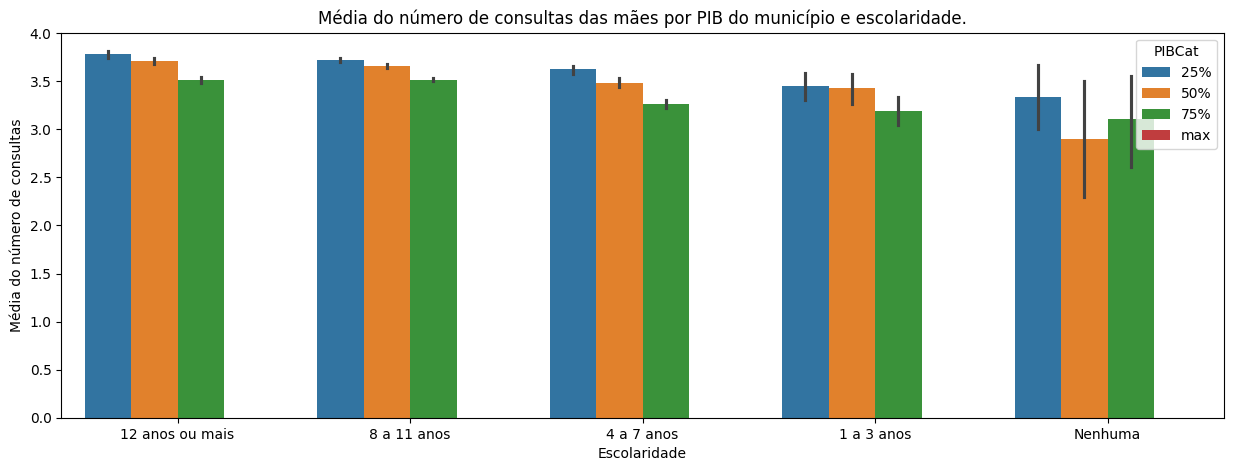

In [57]:
# Plotando o PIB
plt.figure(figsize=(15,5))
plt.title("Média do número de consultas das mães por PIB do município e escolaridade.")
sns.barplot(
    y="CONSULTAS",
    hue="PIBCat",
    x="ESCMAE",
    data=df_copy_pib
)
plt.xlabel("Escolaridade")
plt.ylabel("Média do número de consultas")
plt.show()

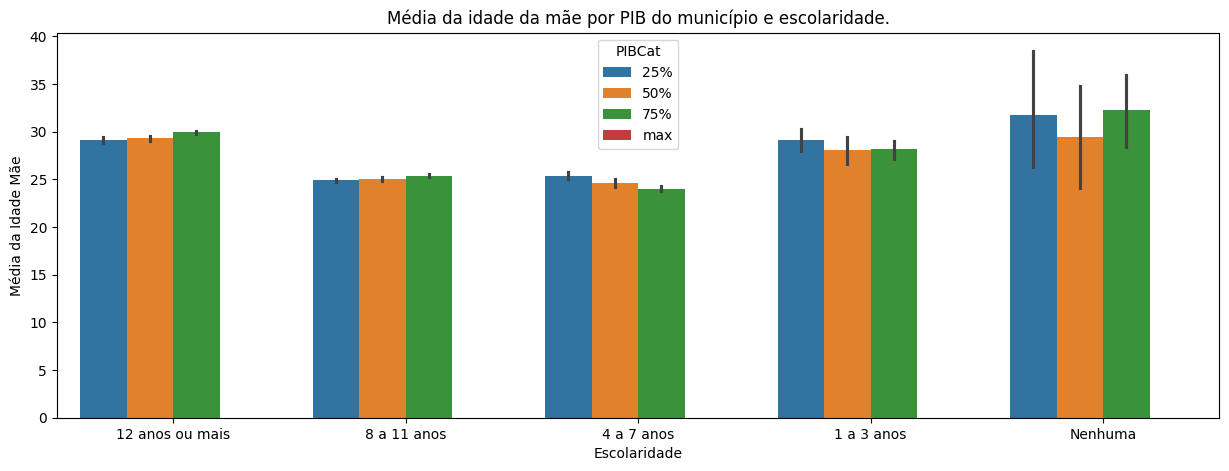

In [64]:
# Plotando o PIB
plt.figure(figsize=(15,5))
plt.title("Média da idade da mãe por PIB do município e escolaridade.")
sns.barplot(
    y="IDADEMAE",
    hue="PIBCat",
    x="ESCMAE",
    data=df_copy_pib
)
plt.xlabel("Escolaridade")
plt.ylabel("Média da Idade Mãe")
plt.show()

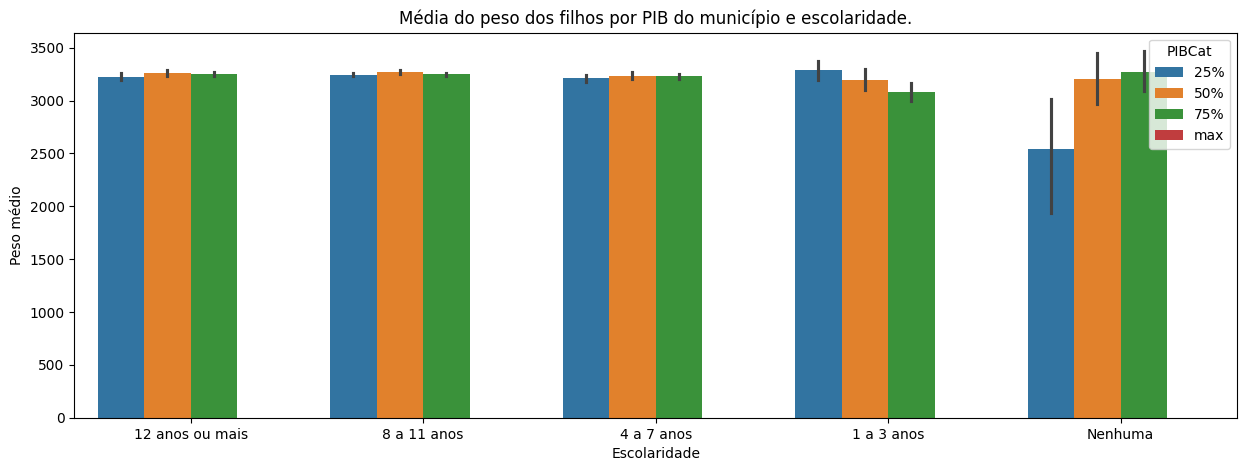

In [65]:
# Plotando o PIB
plt.figure(figsize=(15,5))
plt.title("Média do peso dos filhos por PIB do município e escolaridade.")
sns.barplot(
    y="PESO",
    hue="PIBCat",
    x="ESCMAE",
    data=df_copy_pib
)
plt.xlabel("Escolaridade")
plt.ylabel("Peso médio")
plt.show()

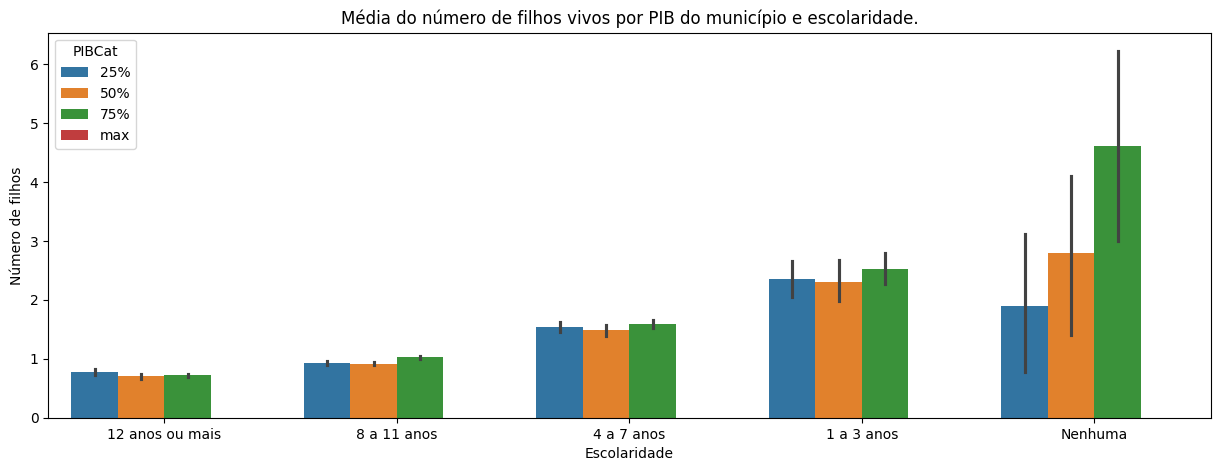

In [66]:
# Plotando o PIB
plt.figure(figsize=(15,5))
plt.title("Média do número de filhos vivos por PIB do município e escolaridade.")
sns.barplot(
    y="QTDFILVIVO",
    hue="PIBCat",
    x="ESCMAE",
    data=df_copy_pib
)
plt.xlabel("Escolaridade")
plt.ylabel("Número de filhos")
plt.show()

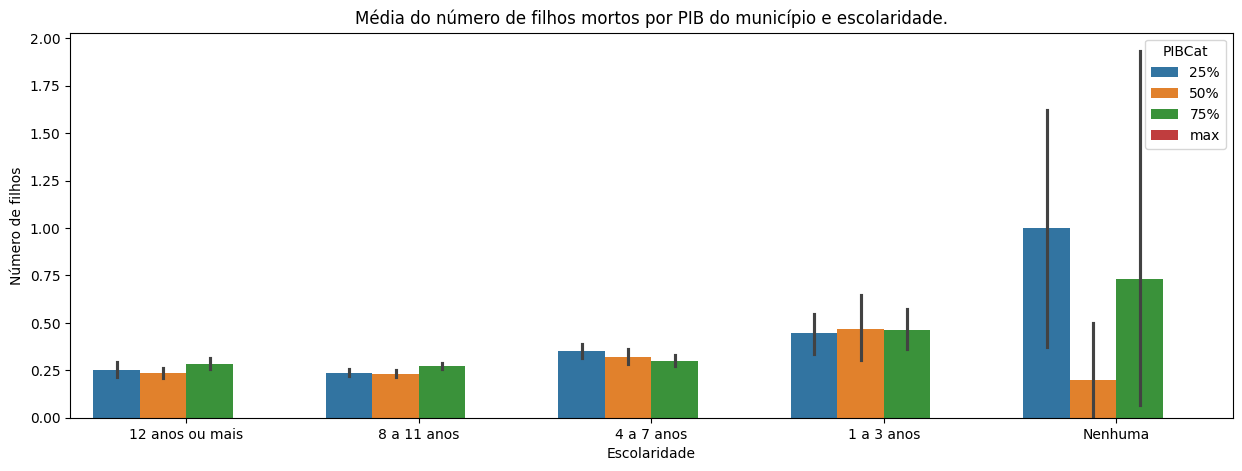

In [63]:
# Plotando o PIB
plt.figure(figsize=(15,5))
plt.title("Média do número de filhos mortos por PIB do município e escolaridade.")
sns.barplot(
    y="QTDFILMORT",
    hue="PIBCat",
    x="ESCMAE",
    data=df_copy_pib
)
plt.xlabel("Escolaridade")
plt.ylabel("Número de filhos")
plt.show()

#### Conclusão

- O PIB parace ter relação com o número de consultas, onde menor faixa de PIB
mais consultas em média são realizadas, independente da escolaridade da mãe.<br>
- Mães com mais escolaridade têm mais consultas em média.<br>
- Nenhum dos municípios apresenta PIB máximo.<br>
- A quantidade de filhos vivos ou mortos varia significativamente em relação a escolaridade da mãe, porém, é independente do PIB.<br>
- Peso dos filhos e idade da  mãe não parece ter relação com o PIB.
